# Random Forest Regression

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [14]:
df = pd.read_csv('Train.csv')

In [15]:
df['Outlet_Establishment_Year'] = df['Outlet_Establishment_Year'].astype('category')

In [16]:
average = df['Item_Weight'].mean()

In [17]:
df['Item_Weight'].fillna(value=average, inplace=True)

In [18]:
df['Outlet_Size'].fillna(value='Medium', inplace=True)

In [19]:
df_real = pd.get_dummies(df, drop_first=True)
df_real


,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,Item_Identifier_DRB25,...,Outlet_Establishment_Year_2004,Outlet_Establishment_Year_2007,Outlet_Establishment_Year_2009,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.300,0.016047,249.8092,3735.1380,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,5.920,0.019278,48.2692,443.4228,0,0,0,0,0,0,...,0,0,1,1,0,0,1,0,1,0
2,17.500,0.016760,141.6180,2097.2700,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,19.200,0.000000,182.0950,732.3800,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,8.930,0.000000,53.8614,994.7052,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,2778.3834,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
8519,8.380,0.046982,108.1570,549.2850,0,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
8520,10.600,0.035186,85.1224,1193.1136,0,0,0,0,0,0,...,1,0,0,0,1,1,0,1,0,0
8521,7.210,0.145221,103.1332,1845.5976,0,0,0,0,0,0,...,0,0,1,1,0,0,1,0,1,0


In [20]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y =StandardScaler()

In [21]:
X = df_real.drop(['Item_Outlet_Sales'], axis=1)
y = np.array(df_real['Item_Outlet_Sales']).reshape(-1, 1)

In [22]:
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [24]:
# ข้อที่ 59
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train, y_train)

<ipython-input-24-dc78859682a6>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_regressor.fit(X_train, y_train)


RandomForestRegressor()

In [26]:
predicted = sc_y.inverse_transform(rf_regressor.predict(X_test))
predicted

array([3174.887274, 3522.734484, 5197.088324, ..., 2056.809334,
       2507.029952, 2397.725566])

In [27]:
y_test = sc_y.inverse_transform(y_test)

In [28]:
y_test

array([[4426.2384],
       [4845.0266],
       [2293.0152],
       ...,
       [1906.8512],
       [2773.057 ],
       [3327.6684]])

In [29]:
# ข้อที่ 60
from sklearn import metrics

print('MAE: ', metrics.mean_absolute_error(y_test, predicted))
print('MSE: ', metrics.mean_squared_error(y_test, predicted))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, predicted)))
print('R2 score: ', metrics.r2_score(y_test, predicted))

MAE:  804.1536461184752
MSE:  1296157.0284202788
RMSE:  1138.48892327518
R2 score:  0.560672570077482


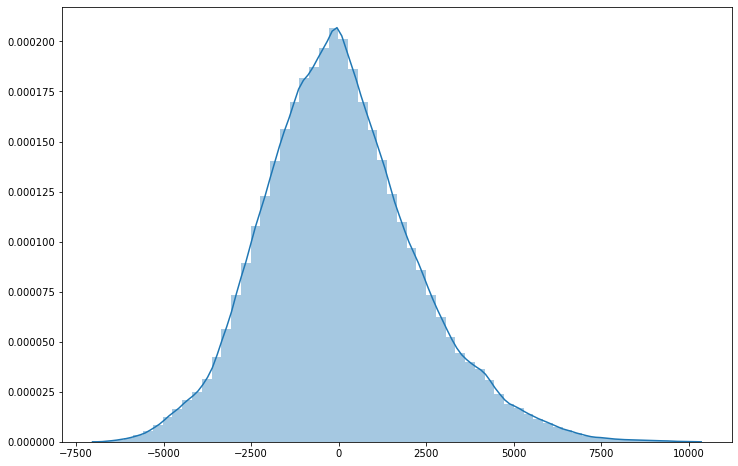

In [30]:
# ข้อที่ 61
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(12, 8))
sns.distplot((y_test-predicted), bins=60)

In [32]:
# ข้อที่ 61
predict_compare = {'Sales': y_test.flatten(), 'Predicted': predicted.flatten()}
df_predicted = pd.DataFrame(predict_compare)
df_predicted

,Sales,Predicted
0,4426.2384,3174.887274
1,4845.0266,3522.734484
2,2293.0152,5197.088324
3,1065.2800,1811.015948
4,2345.6134,2450.749878
...,...,...
1700,3207.8244,2500.478480
1701,2263.7200,1076.585284
1702,1906.8512,2056.809334
1703,2773.0570,2507.029952


In [33]:
df_predicted.corr()

,Sales,Predicted
Sales,1.000000,0.750577
Predicted,0.750577,1.000000
